In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

from PIL import Image
import scipy as sp
import pylab
import h5py

(64, 64)


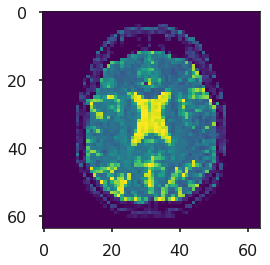

In [9]:
cortex  = Image.open('cortex.bmp')
cortex = np.asarray(cortex)[:,:,0]
# Downsampling
cortex = np.asarray(cortex)[::7,::7]
print(cortex.shape)
plt.imshow(cortex)

In [10]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [11]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


(4096,)
(8100, 1)


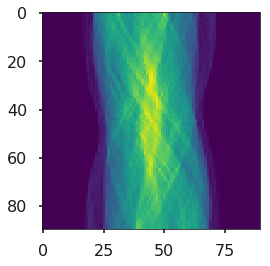

In [12]:
print(cortex.flatten().shape)
p_90 = np.transpose(np.matmul(A_90, cortex.flatten()))
print(p_90.shape)
plt.imshow(p_90.reshape(90, 90))

In [13]:
mat_128 = scipy.io.loadmat('thinL64_128')
print(mat_128['H'].todense().shape)
print(mat_128['H'].todense())

(8100, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
A_128 = mat_128['H'].todense()
print(A_128.shape)
print(np.array_equal(A_90, A_128))

(8100, 4096)
True


(4096,)
(8100, 1)


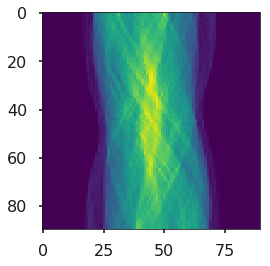

In [15]:
print(cortex.flatten().shape)
p_128 = np.transpose(np.matmul(A_128, cortex.flatten()))
print(p_128.shape)
plt.imshow(p_128.reshape(90, 90))

In [16]:
print(p_128[200])
print(p_90[200])

[[408.72188327]]
[[408.72188327]]


In [17]:
import h5py

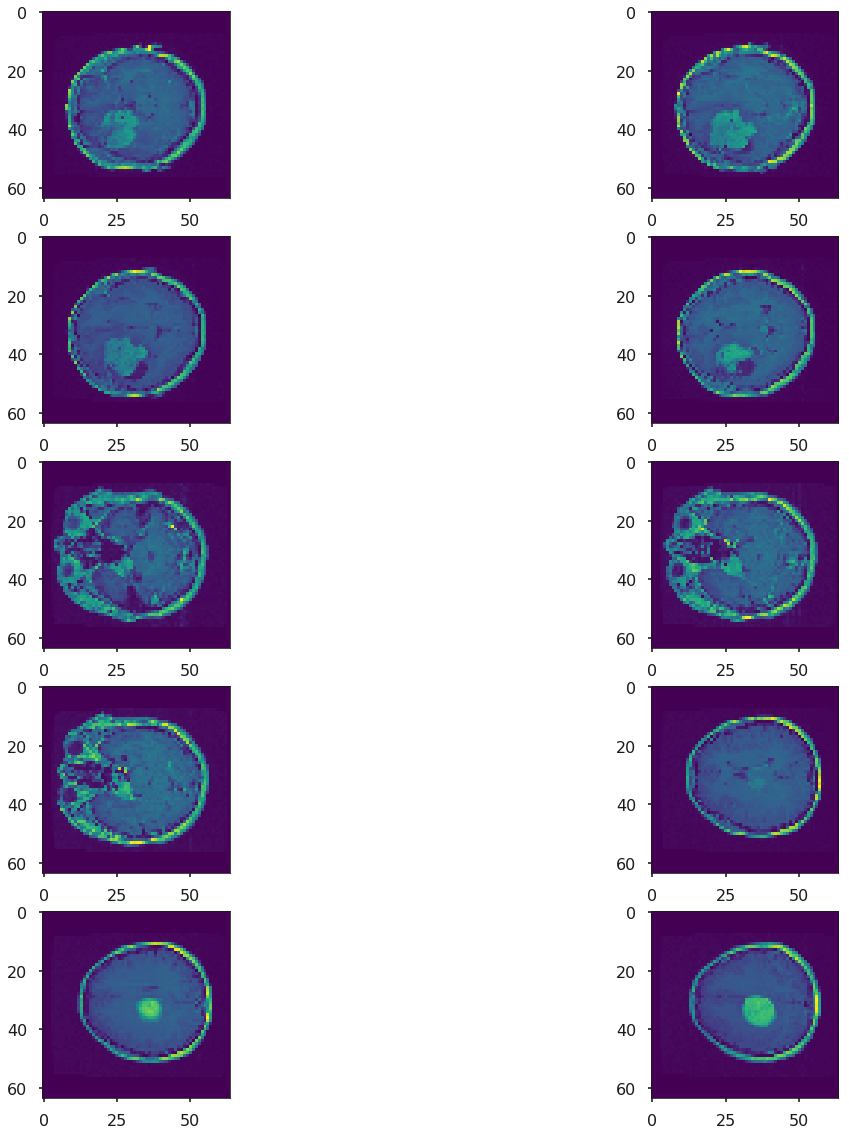

In [21]:
brains = []
for i in range(1, 101):
    with h5py.File('../Brain/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        
        brains += [brain]

columns = 2
rows = 5

fig=plt.figure(figsize=(20, 20))
for i in range(1, columns*rows +1):
    brain = brains[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(brain)
plt.show()

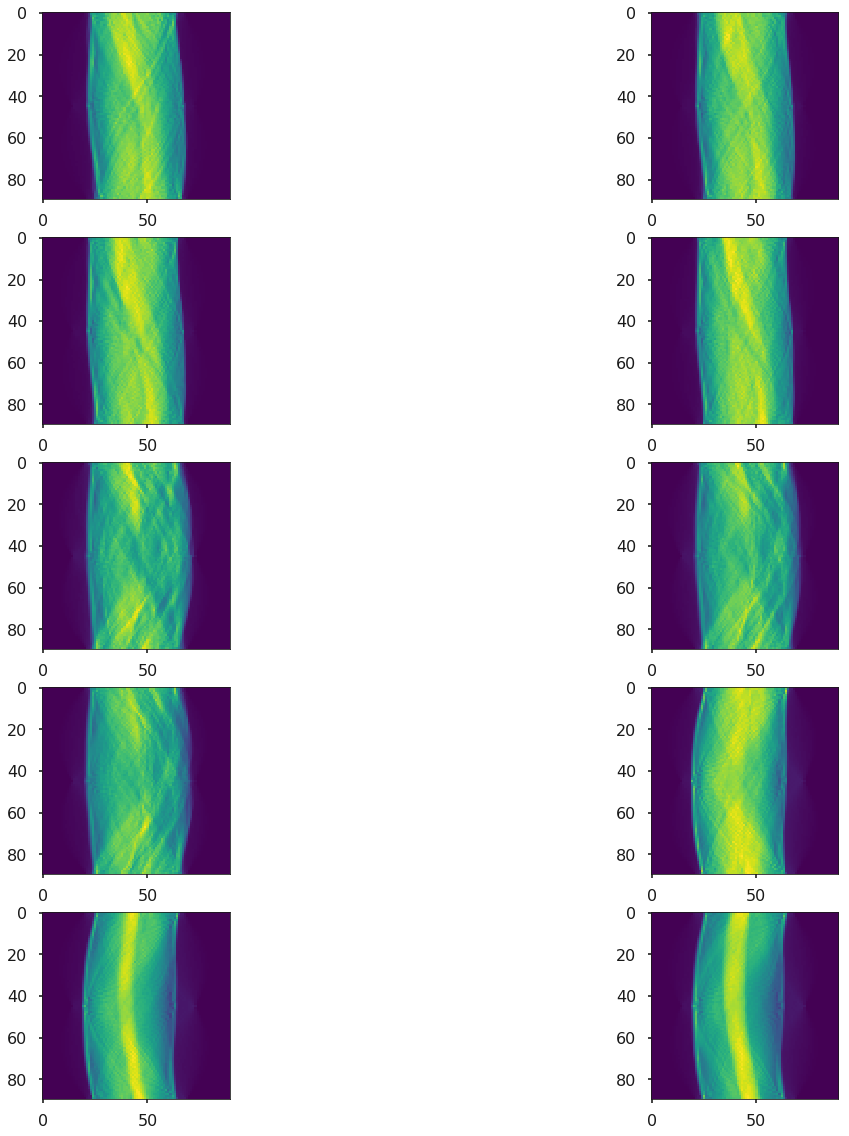

In [22]:
columns = 2
rows = 5
projections = []
fig=plt.figure(figsize=(20, 20))
for i in range(0, 100):
    brain = brains[i]
    p_90 = np.transpose(np.matmul(A_90, brain.flatten()))
    projections += [p_90]
    

for i in range(1, rows*columns + 1):
    p_90 = projections[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(p_90.reshape(90, 90))
    
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout

Using TensorFlow backend.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


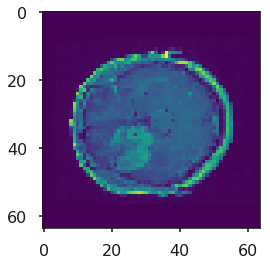

In [34]:
brains = np.array(brains).reshape(100, 64, 64, 1)
projections = np.array(projections).reshape(100, 90, 90, 1)

print(brains[1][:][:][:].reshape(64, 64))
plt.imshow(brains[1][:][:][:].reshape(64, 64))

In [43]:
model_ae = Sequential()

#WHY such a difference with a Sigmoid as the output activation 

model_ae.add(Conv2D(128, (5, 5), activation='relu', input_shape=(64, 64, 1)))
# model_ae.add(MaxPooling2D(pool_size=(2, 2)))
model_ae.add(Conv2D(64, (5, 5), activation='relu'))
model_ae.add(UpSampling2D())
model_ae.add(Conv2D(64, (5, 5), activation='relu'))
# model_ae.add(MaxPooling2D(pool_size=(2, 2)))
model_ae.add(Conv2D(32, (5, 5), activation='relu'))
model_ae.add(Conv2D(8, (5, 5), activation='relu'))
model_ae.add(Conv2D(1, (11, 11), activation='relu'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)
rms = RMSprop()

model_ae.compile(loss='MSE', optimizer=adam)
model_ae.fit(brains, projections, epochs=10, batch_size=5)

Epoch 1/10
100/100 [==============================] - 55s 549ms/step - loss: 460558729.6000
Epoch 2/10
100/100 [==============================] - 57s 574ms/step - loss: 316371808.0000
Epoch 3/10
100/100 [==============================] - 57s 575ms/step - loss: 334797329.6000
Epoch 4/10
100/100 [==============================] - 57s 571ms/step - loss: 297384170.0000
Epoch 5/10
100/100 [==============================] - 58s 576ms/step - loss: 238437262.4000
Epoch 6/10
100/100 [==============================] - 57s 571ms/step - loss: 189458653.6000
Epoch 7/10
100/100 [==============================] - 58s 576ms/step - loss: 175432558.8000
Epoch 8/10
100/100 [==============================] - 57s 571ms/step - loss: 173755276.8000
Epoch 9/10
100/100 [==============================] - 57s 571ms/step - loss: 161553389.6000
Epoch 10/10
100/100 [==============================] - 57s 566ms/step - loss: 148514582.8000


In [44]:
print(np.array(brains).shape)

(100, 64, 64, 1)


In [45]:
prediction_array = model_ae.predict(brains[0].reshape(1, 64, 64, 1))

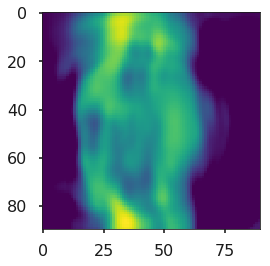

In [46]:
pred = prediction_array.reshape(90, 90)
plt.imshow(pred)

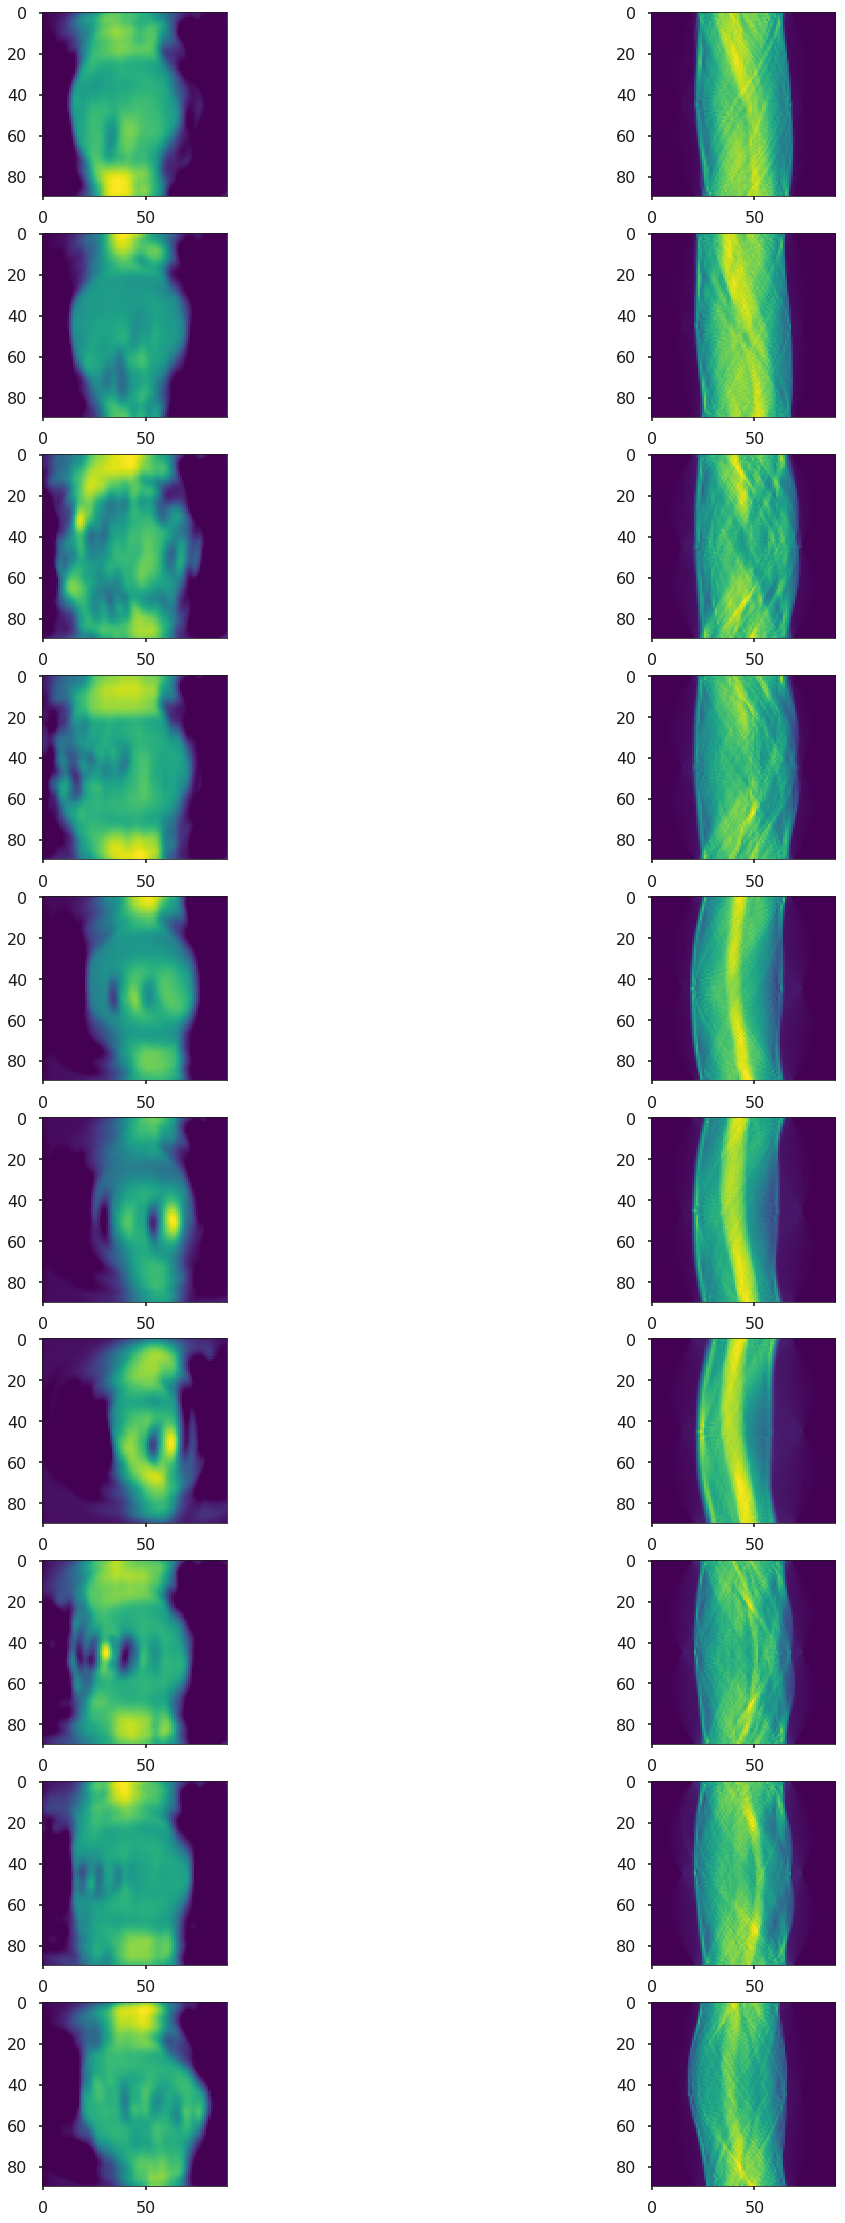

In [47]:
fig=plt.figure(figsize=(20, 40))

rows = 10
columns = 2

for i in range(1, columns*rows + 1, 2):
    pred = model_ae.predict(brains[i].reshape(1, 64, 64, 1)).reshape(90, 90)
    real = projections[i].reshape(90, 90)
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(real)
    